In [1]:
# Load required libraries
import numpy as np
import pandas as pd

# Custom utils from kesh-utils (Check source code: https://github.com/KeshavShetty/kesh-utils)
from KUtils.common import utils
from KUtils.eda import chartil
from KUtils.eda import data_preparation as dp
from KUtils.classifier import generic_classifier_utils as gcu

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, recall_score, precision_score


C:\Users\Nagesh\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
# Show all column in head()
pd.set_option('display.max_columns', None)

In [3]:
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [5]:
#Model starts here 
train_df = pd.read_csv('amexpert_train_df.csv')
test_df = pd.read_csv('amexpert_test_df.csv')

In [6]:
print(train_df.shape)
print(test_df.shape)

(78369, 50)
(50226, 49)


In [7]:
train_df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,age_range,marital_status,rented,family_size,no_of_children,income_bracket,brand,brand_type,category,group_name,item_group_id,campaign_duration,start_date_start_year,start_date_start_month,start_date_start_dow,start_date_start_day,start_date_start_weekofyear,end_date_start_year,end_date_start_month,end_date_start_dow,end_date_start_day,end_date_start_weekofyear,age_range_count,campaign_type_count,marital_status_count,brand_count,brand_type_count,category_count,group_name_count,item_group_id_count,family_size_count,no_of_children_count,J_selling_price_min,J_selling_price_mean,J_selling_price_max,J_selling_price_sum,J_coupon_discount_min,J_coupon_discount_mean,J_coupon_discount_max,J_coupon_discount_sum,J_other_discount_min,J_other_discount_mean,J_other_discount_max,J_other_discount_sum
0,1,13,27,1053,0,1,4,1,0,1,0,5,1105,2,3,24,974,47,2013,5,6,19,20,2013,7,4,5,27,79926,86944,27454,300,102659,86892,298,298,22907,104377,-999.00,-999.00,-999.00,-999.00,-999.0,-999.0,-999.0,-999.0,-999.00,-999.00,-999.00,-999.00
1,2,13,116,48,0,1,3,2,0,2,0,3,56,1,3,370,4,47,2013,5,6,19,20,2013,7,4,5,27,19635,86944,101141,25934,25936,86892,21973,21973,82889,104377,89.06,89.06,89.06,89.06,0.0,0.0,0.0,0.0,-35.25,-35.25,-35.25,-35.25
2,6,9,635,205,0,2,4,2,0,2,0,7,560,2,8,366,4763,32,2013,3,0,11,11,2013,4,4,12,15,79926,41651,101141,325,102659,29929,325,325,82889,104377,-999.00,-999.00,-999.00,-999.00,-999.0,-999.0,-999.0,-999.0,-999.00,-999.00,-999.00,-999.00
3,7,13,644,1050,0,1,4,2,0,2,0,5,611,2,3,388,419,47,2013,5,6,19,20,2013,7,4,5,27,79926,86944,101141,247,102659,86892,247,247,82889,104377,-999.00,-999.00,-999.00,-999.00,-999.0,-999.0,-999.0,-999.0,-999.00,-999.00,-999.00,-999.00
4,9,8,1017,1489,0,1,4,2,0,2,0,3,1558,2,3,95,973,48,2013,2,5,16,7,2013,4,4,5,14,79926,86944,101141,338,102659,86892,338,338,82889,104377,-999.00,-999.00,-999.00,-999.00,-999.0,-999.0,-999.0,-999.0,-999.00,-999.00,-999.00,-999.00


In [8]:
test_df.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,age_range,marital_status,rented,family_size,no_of_children,income_bracket,brand,brand_type,category,group_name,item_group_id,campaign_duration,start_date_start_year,start_date_start_month,start_date_start_dow,start_date_start_day,start_date_start_weekofyear,end_date_start_year,end_date_start_month,end_date_start_dow,end_date_start_day,end_date_start_weekofyear,age_range_count,campaign_type_count,marital_status_count,brand_count,brand_type_count,category_count,group_name_count,item_group_id_count,family_size_count,no_of_children_count,J_selling_price_min,J_selling_price_mean,J_selling_price_max,J_selling_price_sum,J_coupon_discount_min,J_coupon_discount_mean,J_coupon_discount_max,J_coupon_discount_sum,J_other_discount_min,J_other_discount_mean,J_other_discount_max,J_other_discount_sum
0,3,22,869,967,1,3,1,0,1,0,5,1075,2,3,17,1033,32,2013,9,0,16,38,2013,10,4,18,42,19635,86944,27454,1129,102659,86892,1064,1064,22907,104377,83.40,102.06,120.75,204.10,-35.62,-17.81,0.0,-35.62,-48.10,-29.390,-10.69,-58.78
1,4,20,389,1566,2,2,2,0,2,0,9,57,2,8,378,1010,70,2013,9,5,7,36,2013,11,5,16,46,13828,41651,101141,3299,102659,29929,1832,1832,82889,104377,92.25,92.25,92.25,92.25,0.00,0.00,0.0,0.00,0.00,0.000,0.00,0.00
2,5,22,981,510,1,2,2,0,2,1,1,1335,2,3,66,1690,32,2013,9,0,16,38,2013,10,4,18,42,13828,86944,101141,696,102659,86892,696,696,82889,11173,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.0,-999.00,-999.00,-999.000,-999.00,-999.00
3,8,25,1069,361,2,1,1,0,1,0,3,1996,2,3,150,291,32,2013,10,0,21,43,2013,11,4,22,47,4233,41651,27454,811,102659,86892,811,811,22907,104377,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.0,-999.00,-999.00,-999.000,-999.00,-999.00
4,10,17,498,811,2,4,2,0,2,0,5,209,2,3,170,76,32,2013,7,0,29,31,2013,8,4,30,35,79926,41651,101141,1393,102659,86892,1393,1393,82889,104377,85.10,160.50,235.80,321.00,-26.70,-13.35,0.0,-26.70,-10.69,-5.344,0.00,-10.69


# 1. Model 1 on inner (With Bayesian Optimization)

In [9]:
train_df = train_df
# Putting feature variable to X
X = train_df.drop(['id', 'redemption_status'],axis=1)

# Putting response variable to y
y = train_df['redemption_status']

X_train = X
y_train = y

X_test = X
y_test = y


# feature_columns = list(train_df.columns)
# feature_columns.remove('id')
# feature_columns.remove('redemption_status')
# #feature_columns.remove('prediction')
# test_df['redemption_status']=0

# target='redemption_status'

In [11]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)

from bayes_opt import BayesianOptimization

def bo_tune_xgb(max_depth, gamma, n_estimators ,learning_rate, subsample, colsample_bytree):
    params = {'max_depth': int(max_depth),
        'gamma': gamma,
        'n_estimators': int(n_estimators),
        'learning_rate':learning_rate,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'tree_method': 'exact',
        'eval_metric': 'rmse'}
    #Cross validating with the specified parameters in 5 folds and 70 iterations
    cv_result = xgb.cv(params, dtrain, num_boost_round=70, nfold=5)
    #Return the negative RMSE
    return -1.0*cv_result['test-rmse-mean'].iloc[-1]

xgb_bo = BayesianOptimization(bo_tune_xgb, {
    'max_depth': (5,13),
    'gamma': (0, 1),
    'learning_rate':(0, 1),
    'n_estimators':(300, 500),
    'subsample': (0,1),
    'colsample_bytree': (0,1)                                            
})
xgb_bo.maximize(n_iter=5, init_points=8)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.1573   |  0.1212   |  0.3454   |  0.7246   |  5.766    |  455.3    |  0.04245  |
|  2        | -0.08319  |  0.2339   |  0.2051   |  0.5674   |  7.097    |  318.9    |  0.998    |
|  3        | -0.08918  |  0.6934   |  0.3431   |  0.03488  |  7.833    |  314.1    |  0.6048   |
|  4        | -0.1023   |  0.9455   |  0.258    |  0.2754   |  8.245    |  338.0    |  0.08044  |
|  5        | -2.507    |  0.6098   |  0.4064   |  0.9322   |  12.56    |  455.6    |  0.1513   |
|  6        | -0.1009   |  0.6877   |  0.2479   |  0.2293   |  11.15    |  391.3    |  0.08604  |
|  7        | -0.08147  |  0.4636   |  0.1523   |  0.3414   |  12.87    |  452.5    |  0.9698   |
|  8        | -0.09082  |  0.3222   |  0.1562   |  0.5225   |  11.98    |  304.9    |  0.6516   |
|  9        | -0.081

In [13]:
#Extracting the best parameters
params = xgb_bo.max['params']
print(params)

#Converting the max_depth and n_estimator values from float to int
params['max_depth']= int(params['max_depth'])
params['n_estimators']= int(params['n_estimators'])
params['tree_method']= 'exact'
print(params)

#Initialize an XGBClassifier with the tuned parameters and fit the training data
from xgboost import XGBClassifier
final_clf = XGBClassifier(**params).fit(X_train, y_train)

#predicting for training set
y_pred_default = final_clf.predict(X_test)

{'colsample_bytree': 0.46358489493050636, 'gamma': 0.15234477865947238, 'learning_rate': 0.34141807489113896, 'max_depth': 12.874672276564048, 'n_estimators': 452.4541061391583, 'subsample': 0.9698360698279391}
{'colsample_bytree': 0.46358489493050636, 'gamma': 0.15234477865947238, 'learning_rate': 0.34141807489113896, 'max_depth': 12, 'n_estimators': 452, 'subsample': 0.9698360698279391, 'tree_method': 'exact'}


In [21]:
inner_model = final_clf

In [14]:
# Printing classification report
print(classification_report(y_test, y_pred_default))

local_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_default )

# Printing confusion matrix and accuracy
print('Confusion Matrix:')
print(local_confusion_matrix)

# Accuracy, precision, recall and f1 score
print('\nScores:')
accuracy = metrics.accuracy_score(y_test, y_pred_default)
precision = metrics.precision_score(y_test, y_pred_default)
recall = metrics.recall_score(y_test, y_pred_default)
f1_score = metrics.f1_score(y_test, y_pred_default)
roc_auc = metrics.roc_auc_score(y_test, y_pred_default)
sensitivity = recall
specificity =  local_confusion_matrix[0,0]/(local_confusion_matrix[0,0]+local_confusion_matrix[0,1])
print(" Accuracy {0:.3f}, \n Sensitivity {1:.3f}, \n Specificity {2:.3f}, \n Precision {3:.3f}, \n Recall {4:.3f}, \n f1_score {5:.3f}, \n roc_auc {6:.3f}".format(
    accuracy, sensitivity,specificity, precision,recall,f1_score,roc_auc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     77640
           1       1.00      1.00      1.00       729

    accuracy                           1.00     78369
   macro avg       1.00      1.00      1.00     78369
weighted avg       1.00      1.00      1.00     78369

Confusion Matrix:
[[77640     0]
 [    0   729]]

Scores:
 Accuracy 1.000, 
 Sensitivity 1.000, 
 Specificity 1.000, 
 Precision 1.000, 
 Recall 1.000, 
 f1_score 1.000, 
 roc_auc 1.000


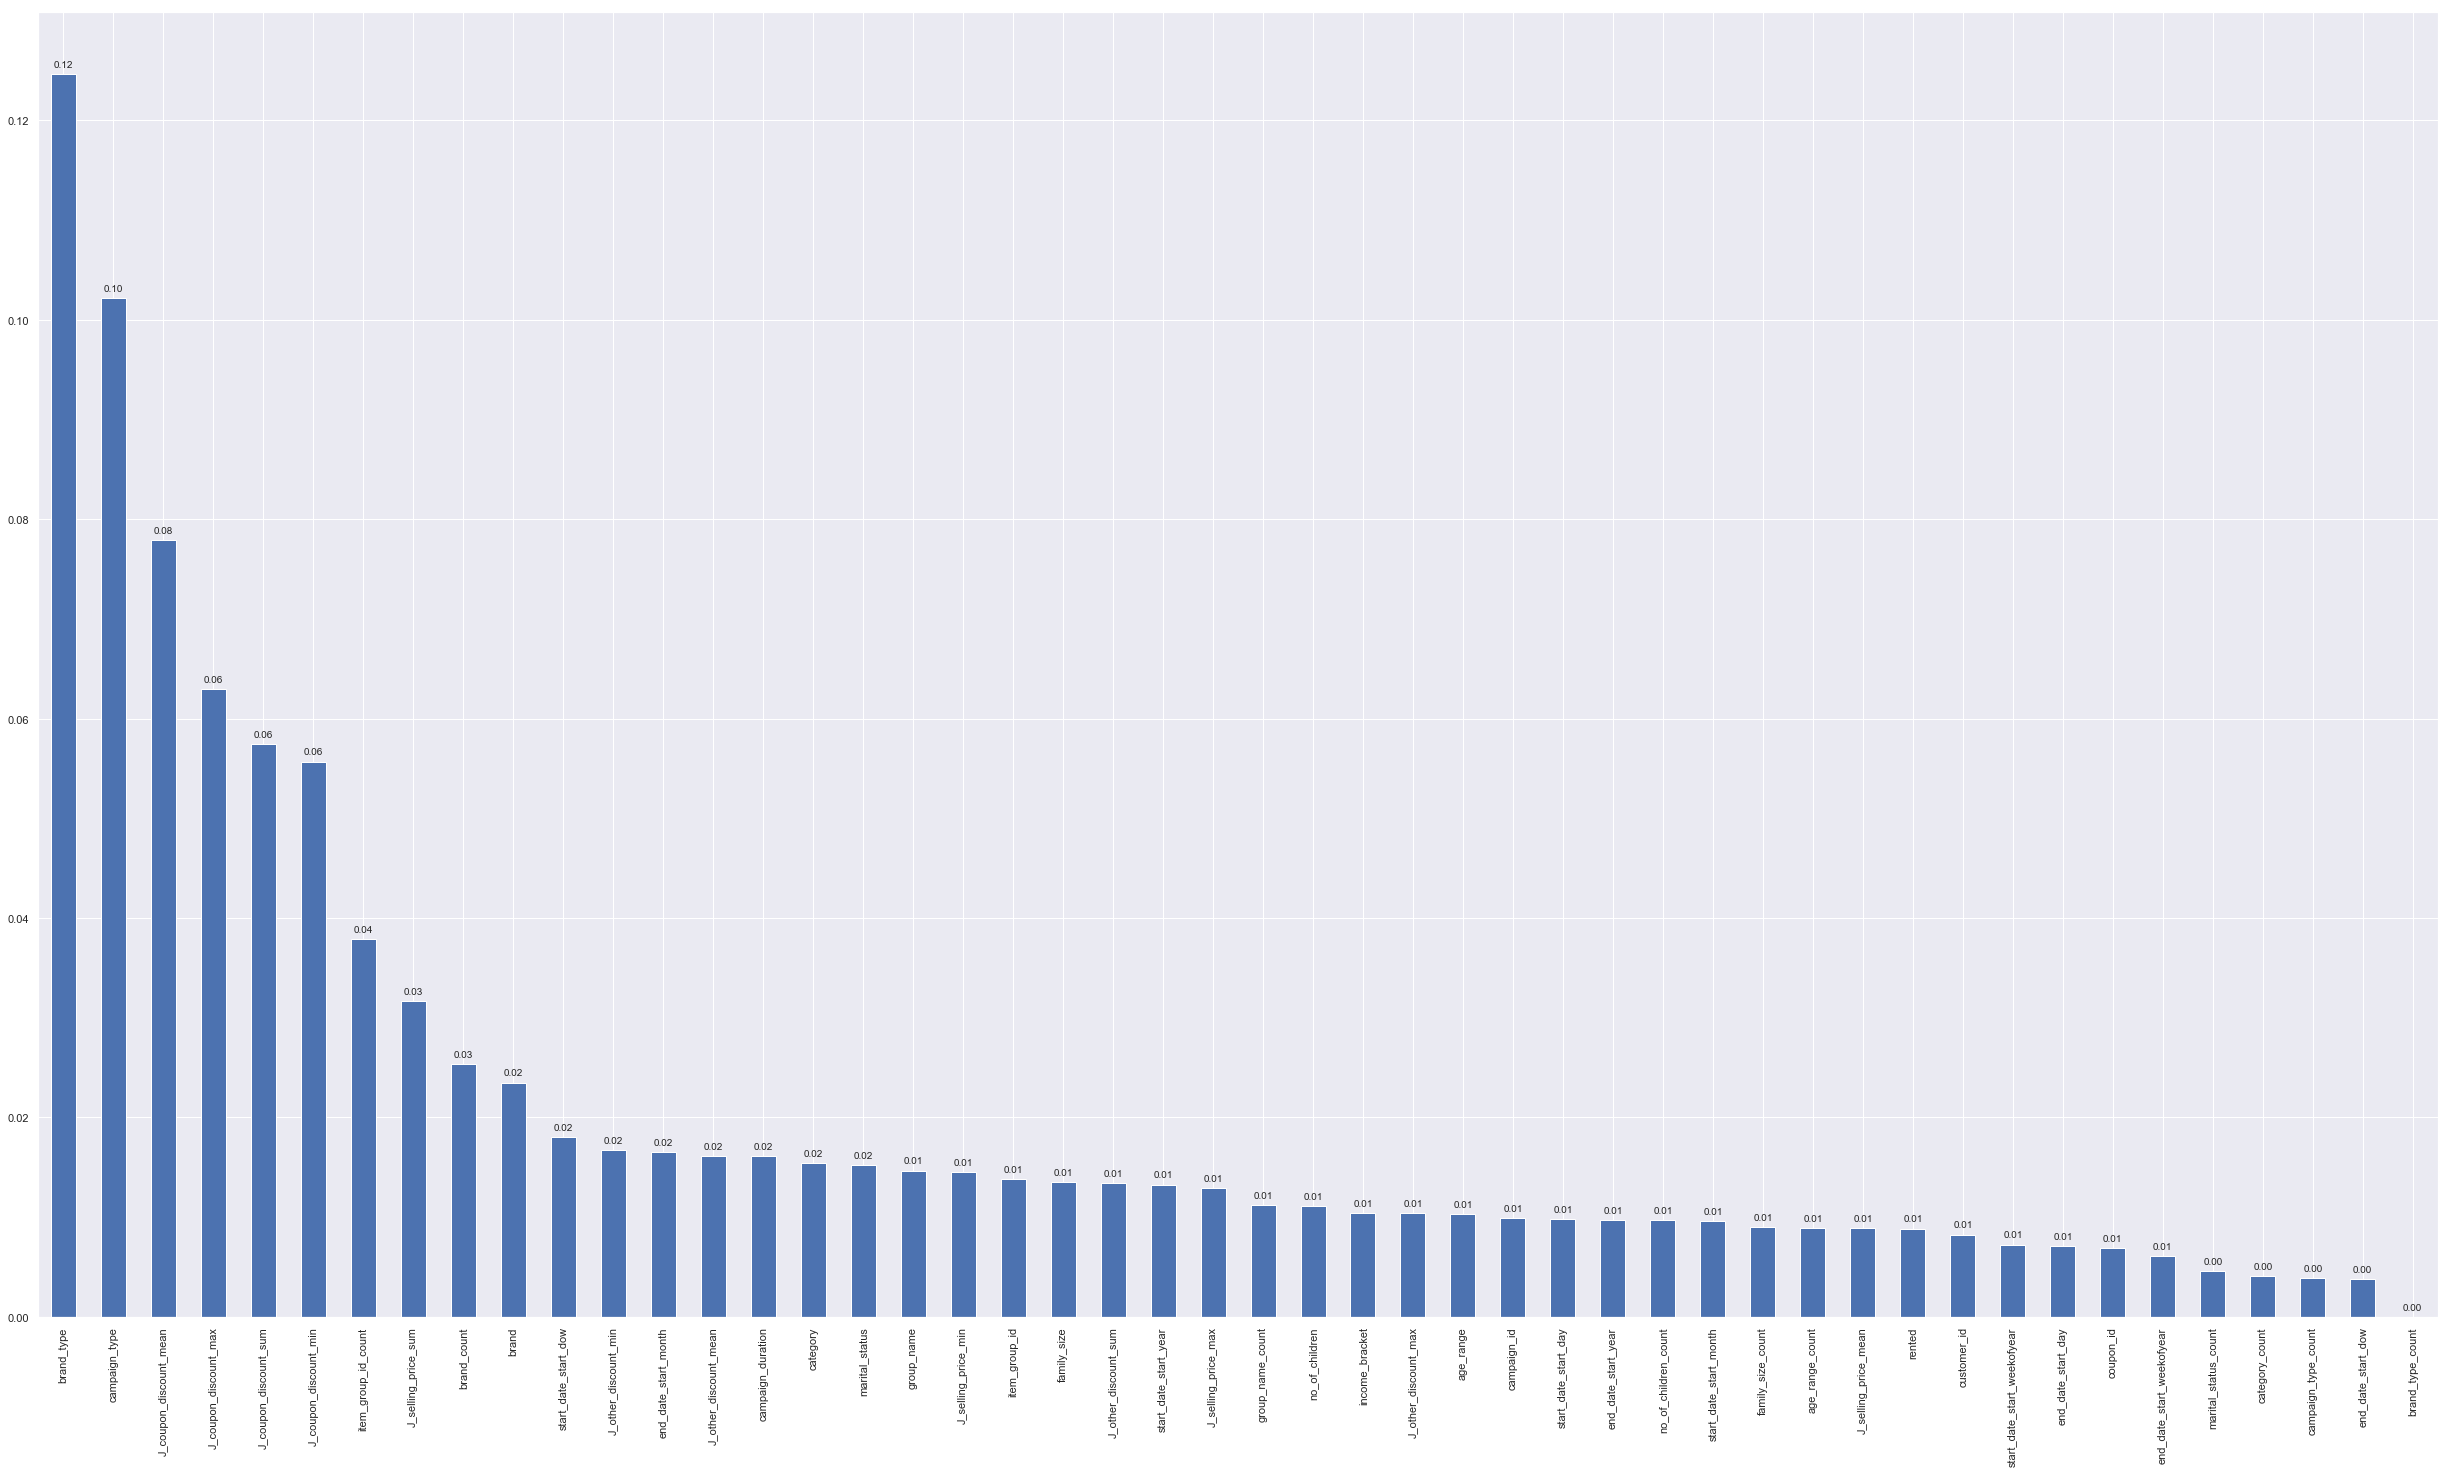

In [15]:
# Feature importance
importances = final_clf.feature_importances_
unique_dict = dict(zip(X_train.columns, importances))
chartil.core_barchart_from_series(
    pd.Series(unique_dict), 
    optional_settings={'sort_by_value':True, 'decimal_precision':2}) 

In [ ]:
print(inner_model)


# Apply final model on test 

In [17]:
test_df.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'campaign_type',
       'age_range', 'marital_status', 'rented', 'family_size',
       'no_of_children', 'income_bracket', 'brand', 'brand_type', 'category',
       'group_name', 'item_group_id', 'campaign_duration',
       'start_date_start_year', 'start_date_start_month',
       'start_date_start_dow', 'start_date_start_day',
       'start_date_start_weekofyear', 'end_date_start_year',
       'end_date_start_month', 'end_date_start_dow', 'end_date_start_day',
       'end_date_start_weekofyear', 'age_range_count', 'campaign_type_count',
       'marital_status_count', 'brand_count', 'brand_type_count',
       'category_count', 'group_name_count', 'item_group_id_count',
       'family_size_count', 'no_of_children_count', 'J_selling_price_min',
       'J_selling_price_mean', 'J_selling_price_max', 'J_selling_price_sum',
       'J_coupon_discount_min', 'J_coupon_discount_mean',
       'J_coupon_discount_max', 'J_coupon_discount_sum',

In [18]:
train_df.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status',
       'campaign_type', 'age_range', 'marital_status', 'rented', 'family_size',
       'no_of_children', 'income_bracket', 'brand', 'brand_type', 'category',
       'group_name', 'item_group_id', 'campaign_duration',
       'start_date_start_year', 'start_date_start_month',
       'start_date_start_dow', 'start_date_start_day',
       'start_date_start_weekofyear', 'end_date_start_year',
       'end_date_start_month', 'end_date_start_dow', 'end_date_start_day',
       'end_date_start_weekofyear', 'age_range_count', 'campaign_type_count',
       'marital_status_count', 'brand_count', 'brand_type_count',
       'category_count', 'group_name_count', 'item_group_id_count',
       'family_size_count', 'no_of_children_count', 'J_selling_price_min',
       'J_selling_price_mean', 'J_selling_price_max', 'J_selling_price_sum',
       'J_coupon_discount_min', 'J_coupon_discount_mean',
       'J_coupon_discount_max', 'J_

In [19]:
test_df.shape

(50226, 49)

In [22]:
ext_pred_proba = inner_model.predict_proba(test_df.drop(['id'], axis=1))

In [23]:
test_df['redemption_status'] = ext_pred_proba[:,1]


In [24]:
inner_tst = test_df.loc[:,['id', 'redemption_status' ]]

In [25]:
inner_tst.head()

,id,redemption_status
0,3,4.885250e-01
1,4,2.910167e-07
2,5,6.473147e-06
3,8,1.274177e-06
4,10,1.585561e-05


In [26]:
submission_csv = inner_tst

In [27]:
submission_csv.shape

(50226, 2)

In [28]:
submission_csv.to_csv("AmEx_xgb_submission.csv", index=False)
